In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
font1 = {'family' : 'Times New Roman', 'weight' : 'normal','size'   : 30}
font2 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size'   : 20}
sns.set(style='darkgrid',palette='dark',color_codes=True)

In [31]:
iclr19= pd.read_csv("conferences_cleaned/iclr19_reviews.csv")
iclr20= pd.read_csv("conferences_cleaned/iclr20_reviews.csv")
midl19= pd.read_csv("conferences_cleaned/midl19_reviews.csv")
midl20= pd.read_csv("conferences_cleaned/midl20_reviews.csv")
graph20= pd.read_csv("conferences_cleaned/graph20_reviews.csv")
neuro19= pd.read_csv("conferences_cleaned/neuroai19_reviews.csv")
#allconf=pd.read_csv("conferences_cleaned/all.csv",dtype=float)
#sample=pd.read_csv("/content/Data for Statistical Analysis/sample.csv",dtype=float)
conf_list=[iclr19,midl19,neuro19,iclr20,midl20,graph20]
conf_str=['ICLR19','MIDL19','Neuro19','ICLR20','MIDL20','Graphics20']

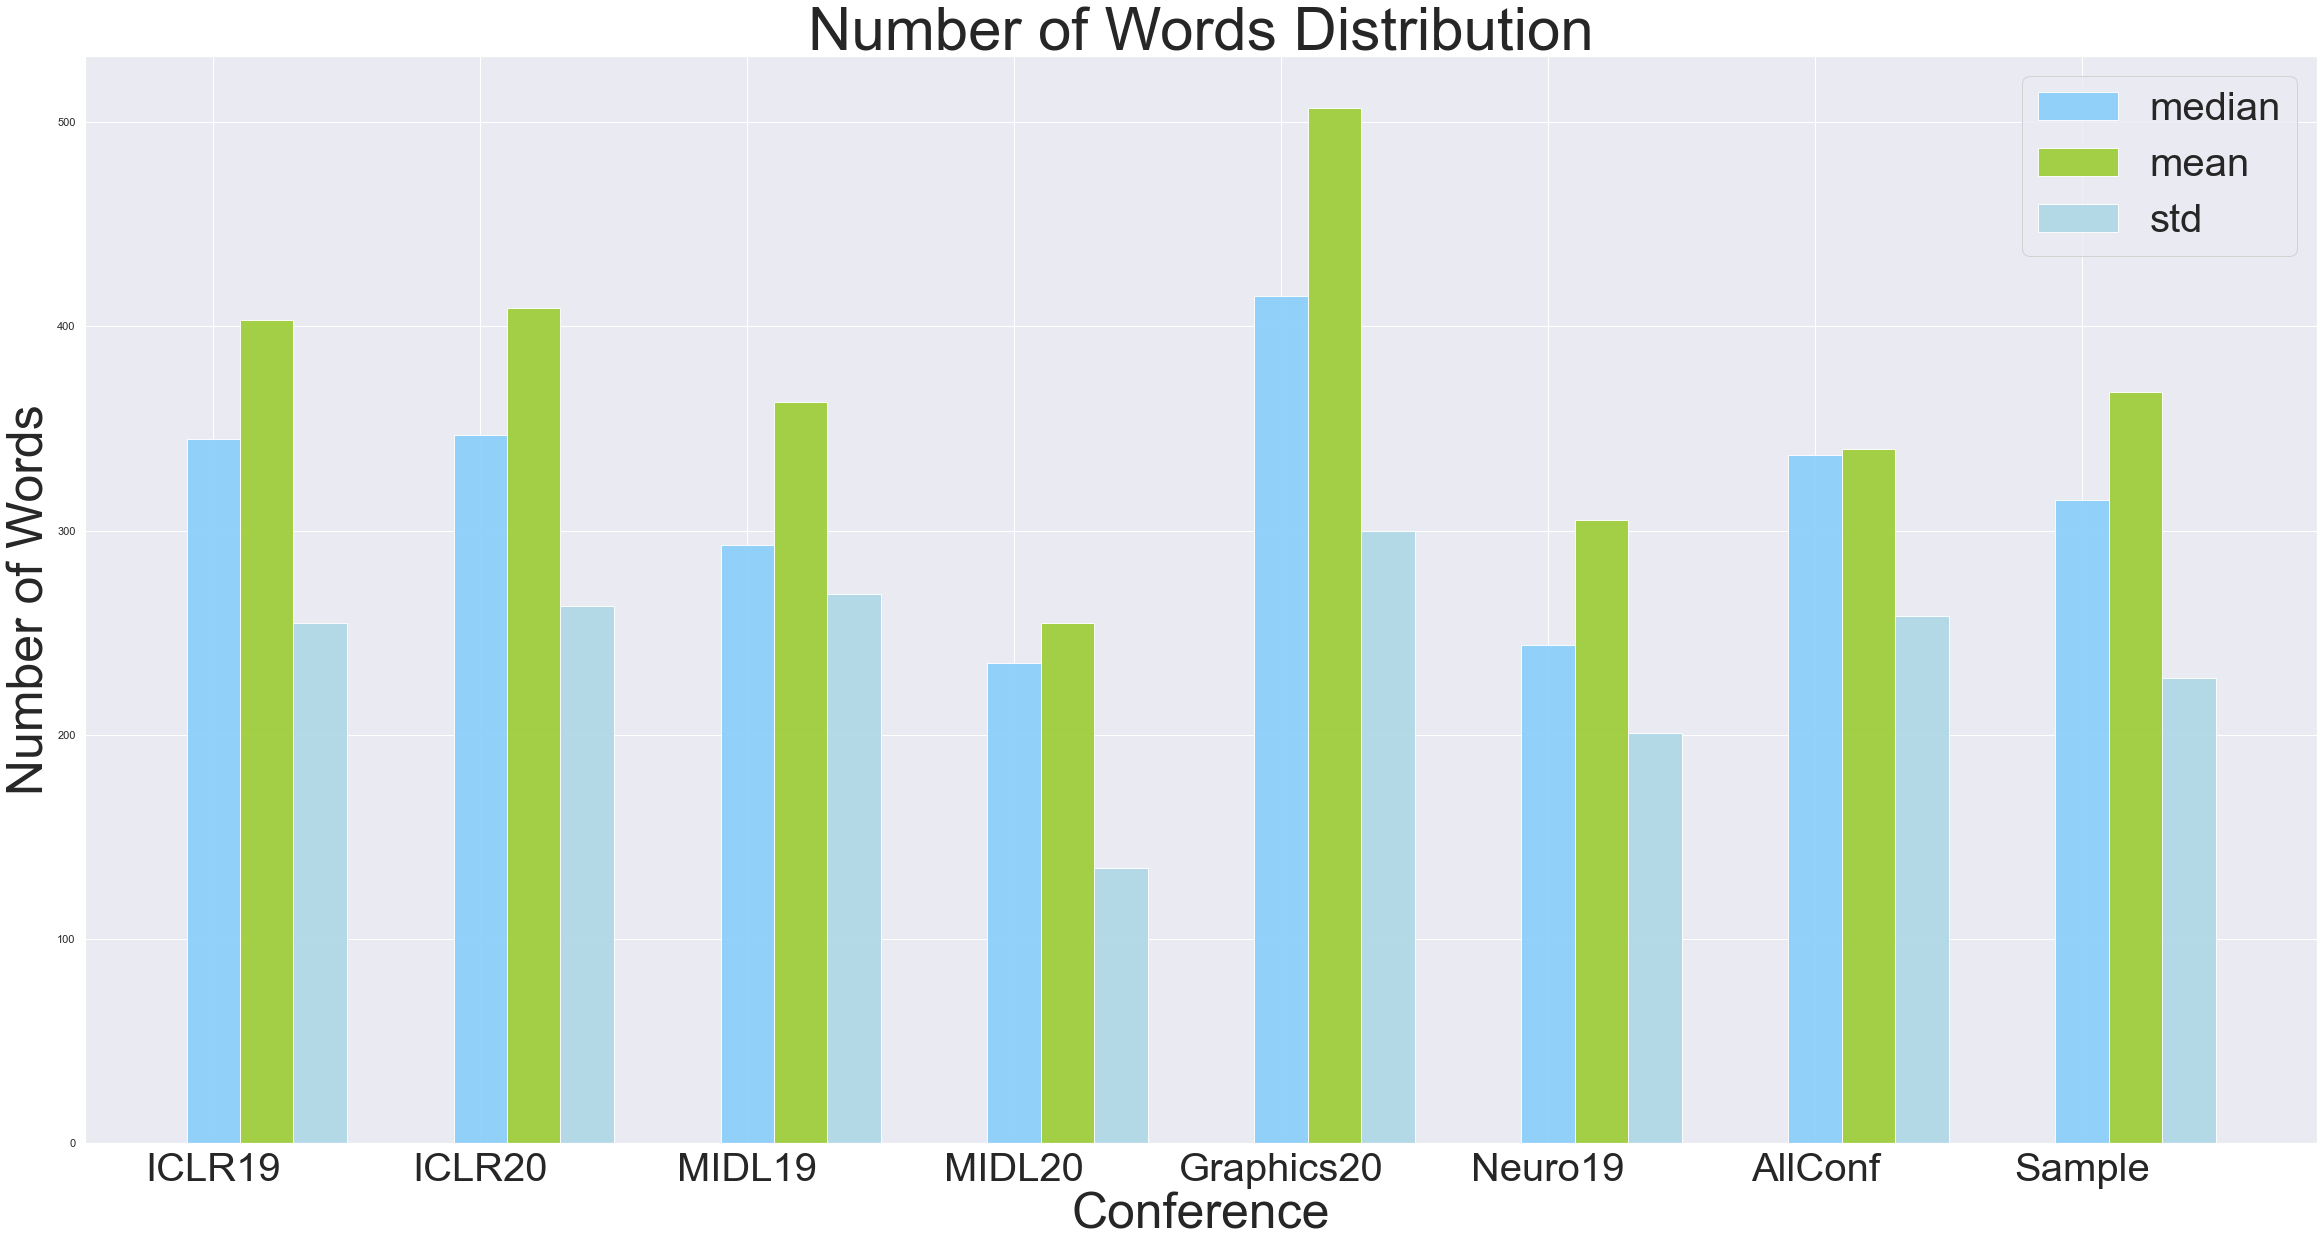

In [32]:
plt.figure(figsize=(40,20))
X=np.arange(8)+1
median=[345,347,293,235,415,244,337,315]
mean=[403,409,363,255,507,305,340,368]
std=[255,263,269,135,300,201,258,228]
plt.bar(X, median, alpha=0.9, width = 0.2, facecolor = 'lightskyblue', edgecolor = 'white', label='median', lw=1)
plt.bar(X+0.2, mean, alpha=0.9, width = 0.2, facecolor = 'yellowgreen', edgecolor = 'white', label='mean', lw=1)
plt.bar(X+0.4, std, alpha=0.9, width = 0.2, facecolor = 'lightblue', edgecolor = 'white', label='std', lw=1)
plt.title("Number of Words Distribution",fontsize=60)
plt.xlabel("Conference",fontsize=50)
plt.ylabel("Number of Words",fontsize=50)
plt.legend(fontsize=40)
index_ls = ['ICLR19','ICLR20','MIDL19','MIDL20','Graphics20','Neuro19','AllConf','Sample']
_ = plt.xticks(X,index_ls,fontsize=40)

**3.1 How long are the reviews?** 

|Conference|median number of words|mean number of words|standard deviation|
|:--:|:--:|:--:|:--:|
|ICLR19|345|403|255|
|ICLR20|347|409|263|
|MIDL19|293|363|269|
|MIDL20|235|255|135|
|Graphics20|415|507|300|
|NeuroAI19|244|305|201|
|AllConf|337|340|258|
|Sample|315|368|228|

The **standard deviation** measures the average spread around the mean, and therefore gives a sense of the ‘typical’ distance from the mean.

C:\Users\Effi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Effi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Effi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

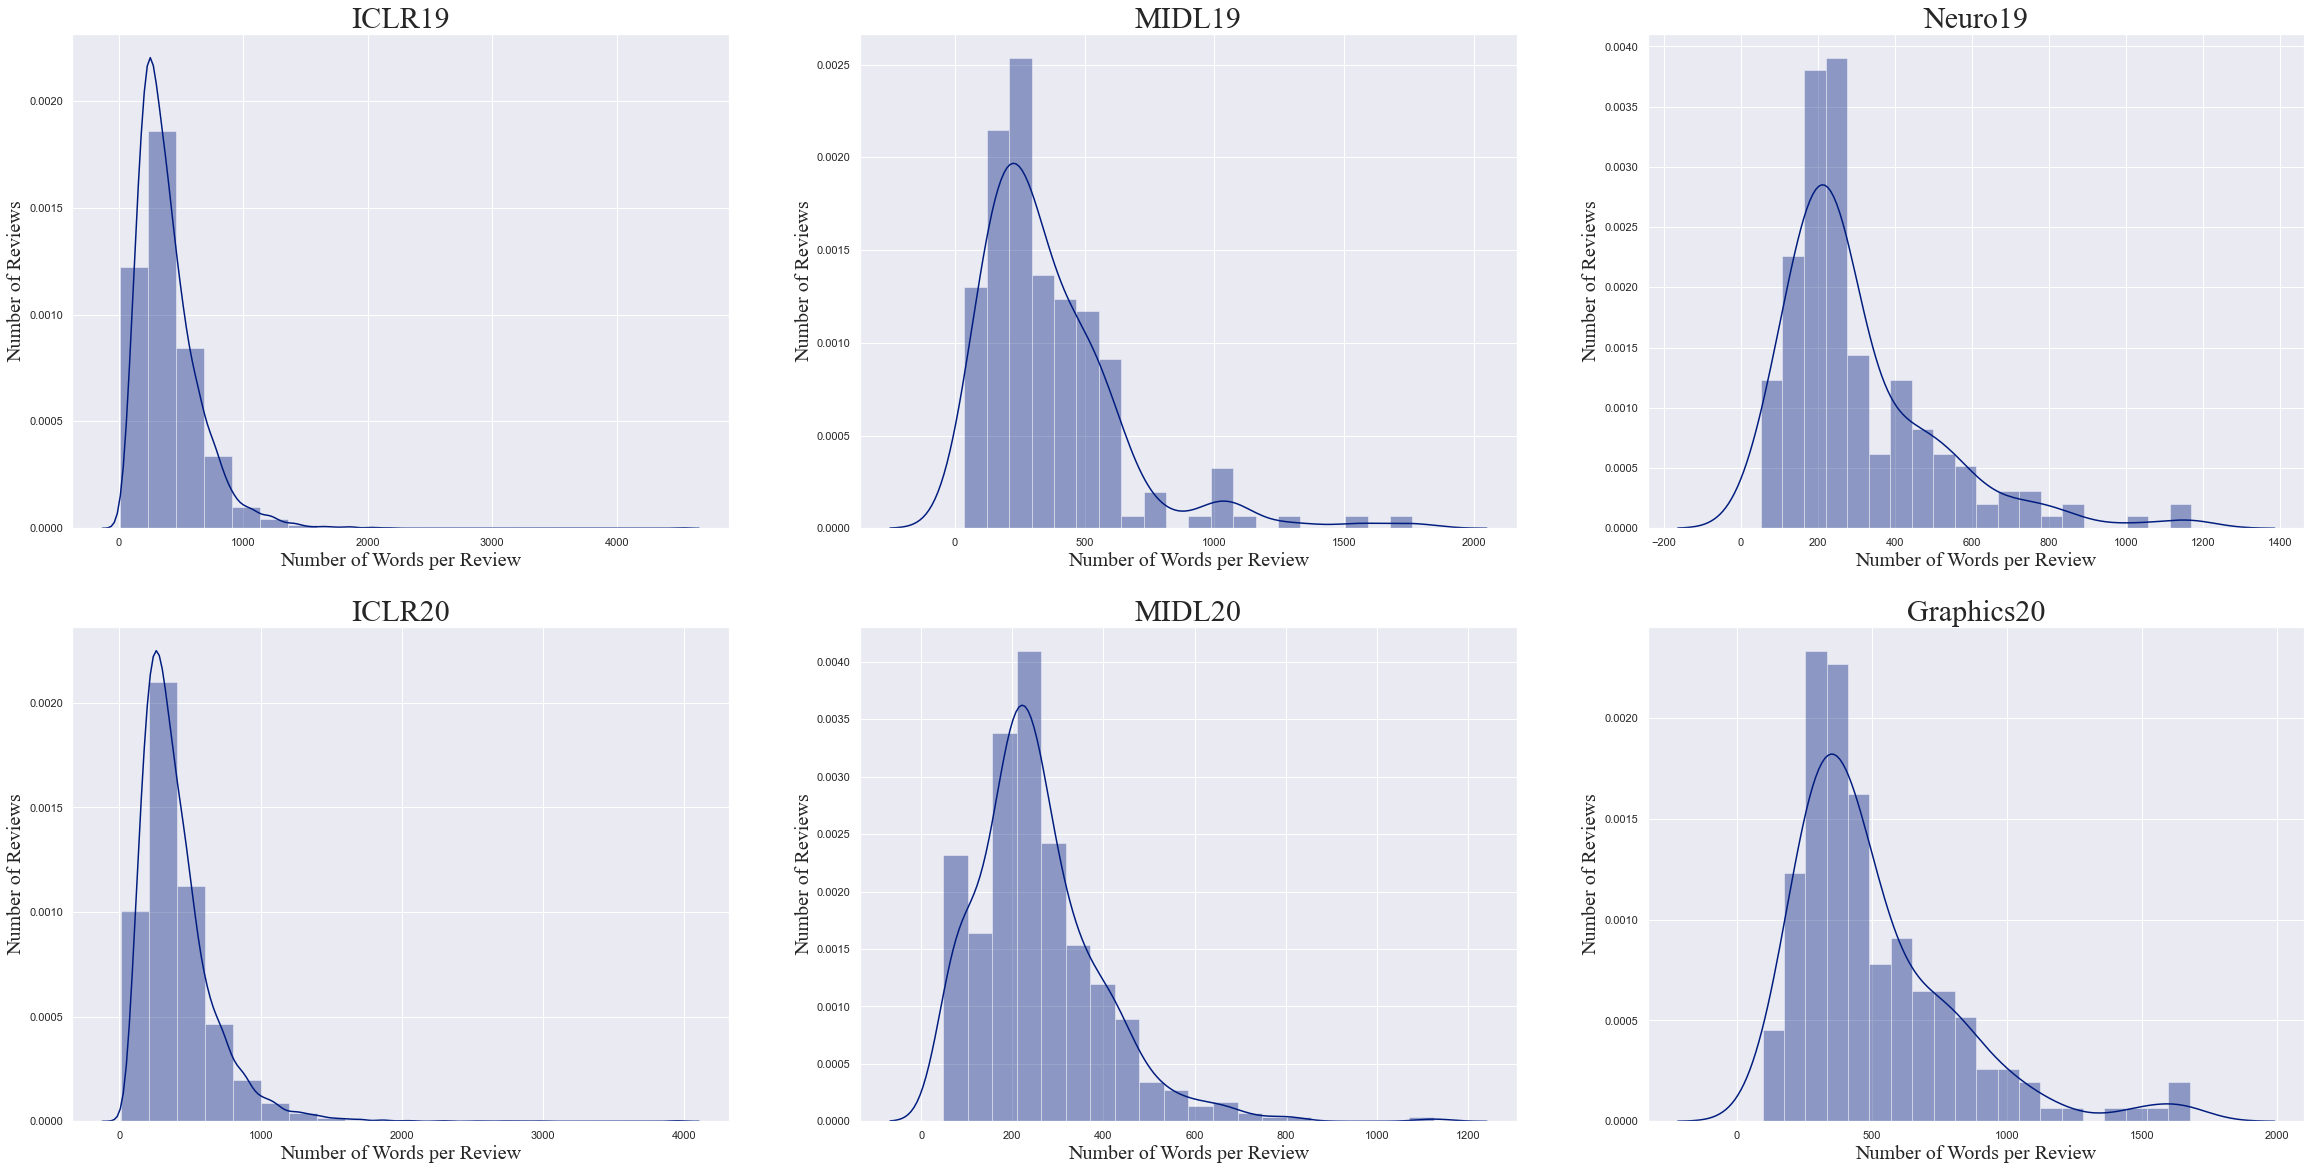

In [33]:
plt.figure(figsize=(40,20))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    sns.distplot(conf_list[i]['review'].str.count(' '), kde=True, rug=False,bins=20)
    plt.title(conf_str[i],font1)
    plt.xlabel("Number of Words per Review",font2)
    plt.ylabel("Number of Reviews",font2)

C:\Users\Effi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


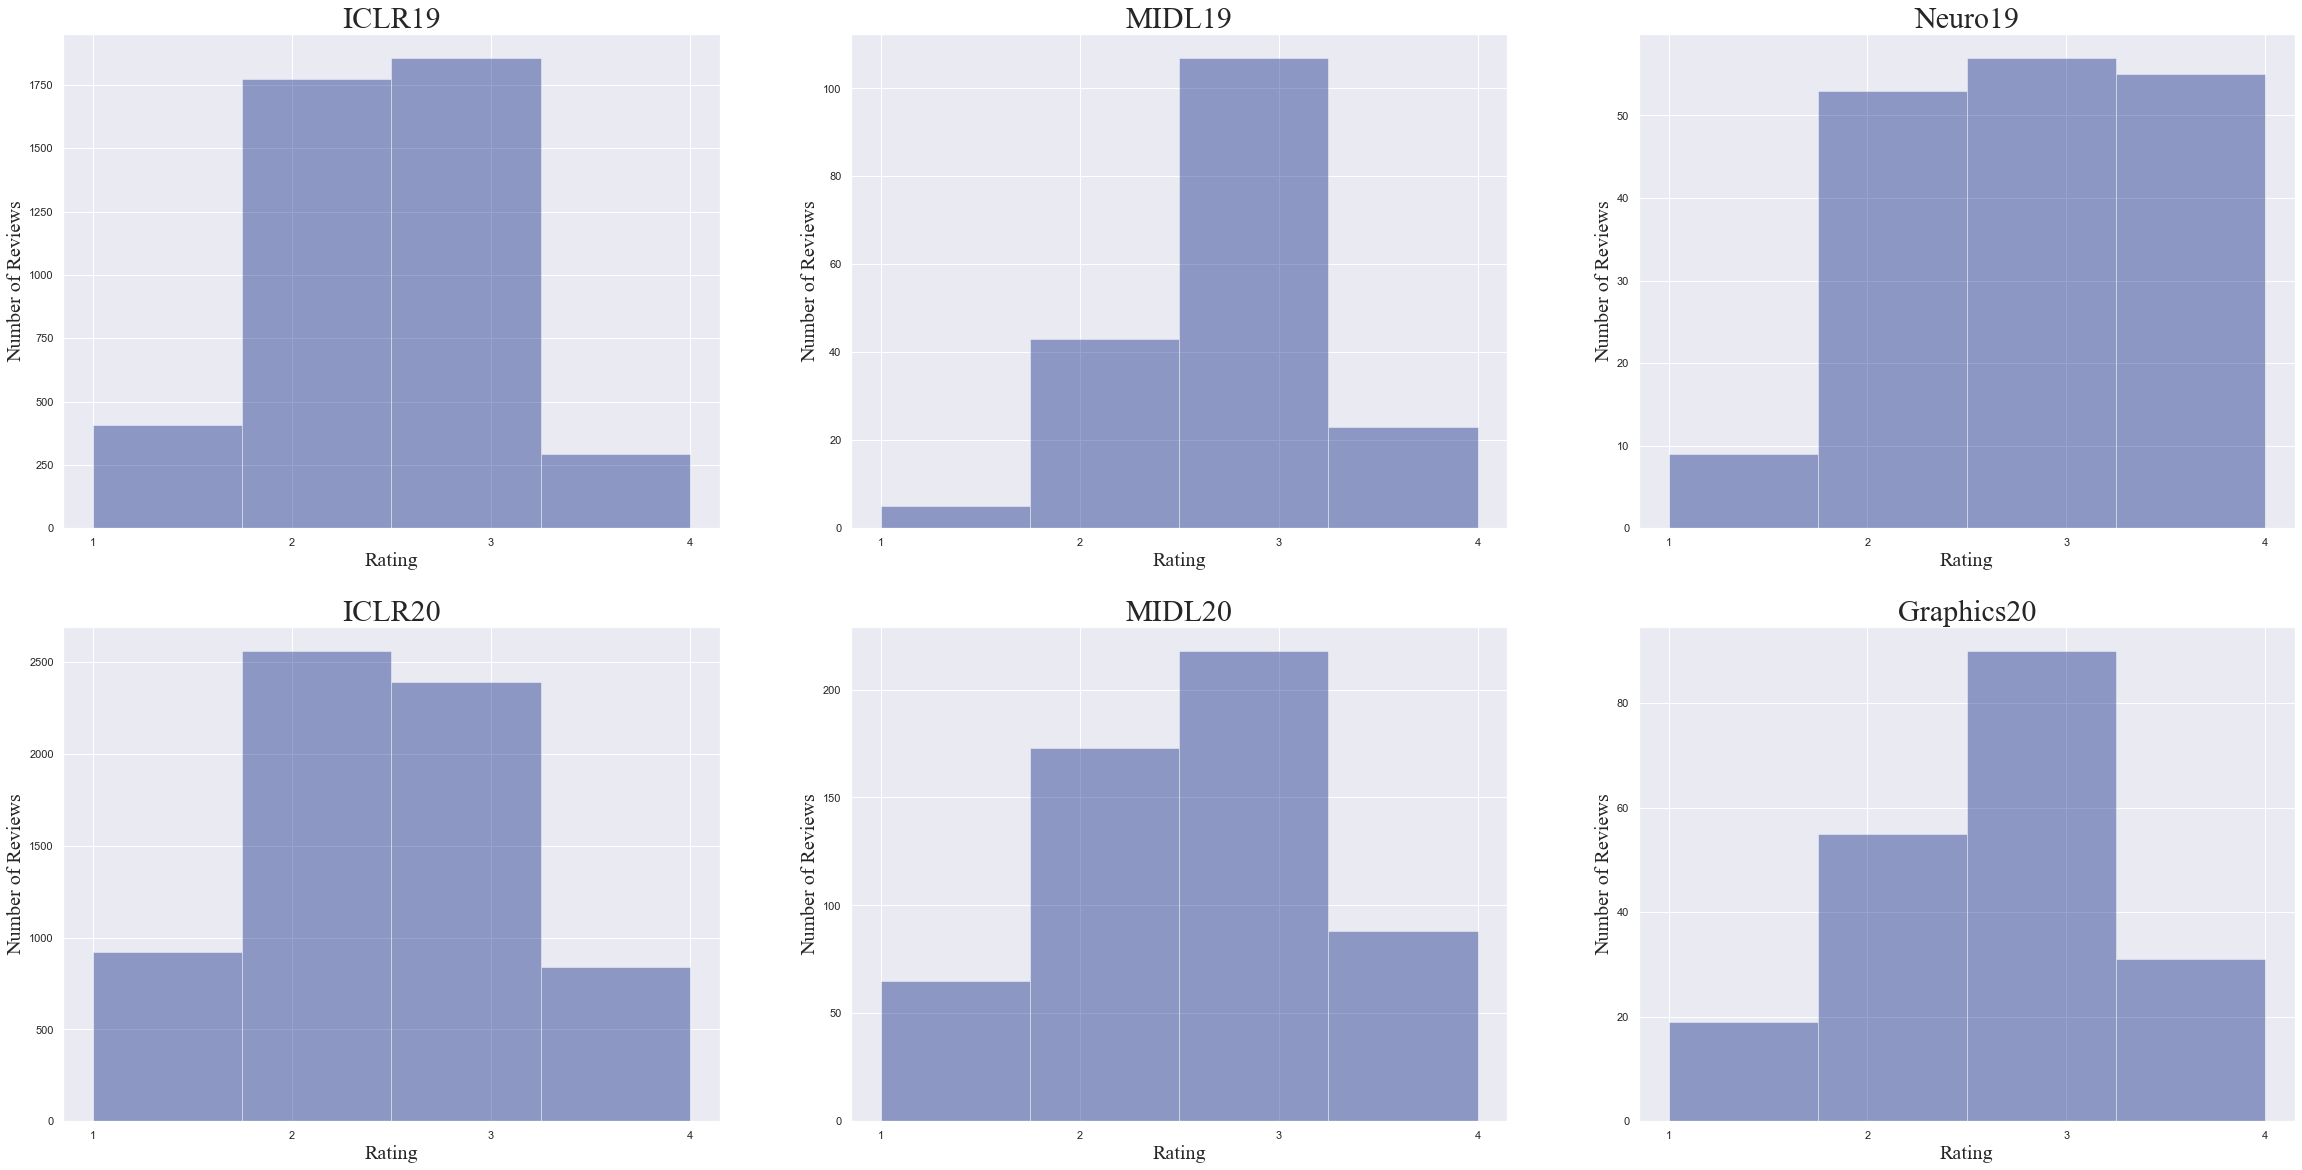

In [34]:
plt.figure(figsize=(40,20))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    sns.distplot(conf_list[i]['rating'], kde=False, rug=False,bins=4)
    plt.title(conf_str[i],font1)
    plt.xlabel("Rating",font2)
    plt.ylabel("Number of Reviews",font2)
    plt.xticks([1, 2, 3, 4])  

**Relationship between word count and rating**



|Conference|Rating 1|Rating 2|Rating 3|Rating 4|
|:--:|:--:|:--:|:--:|:--:|
|ICLR19|413|409|399|387|
|ICLR20|432|428|385|397|
|MIDL19|549|405|336|365|
|MIDL20|263|266|251|235|
|Graphics20|453|536|525|436|
|NeuroAI19|380|327|306|271|
|AllConf|419|415|385|379|
|Sample|511|369|364|332|
 
 <center> Table : Average Number of Words v.s. the Rating </center>


(array([200., 250., 300., 350., 400., 450., 500., 550., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

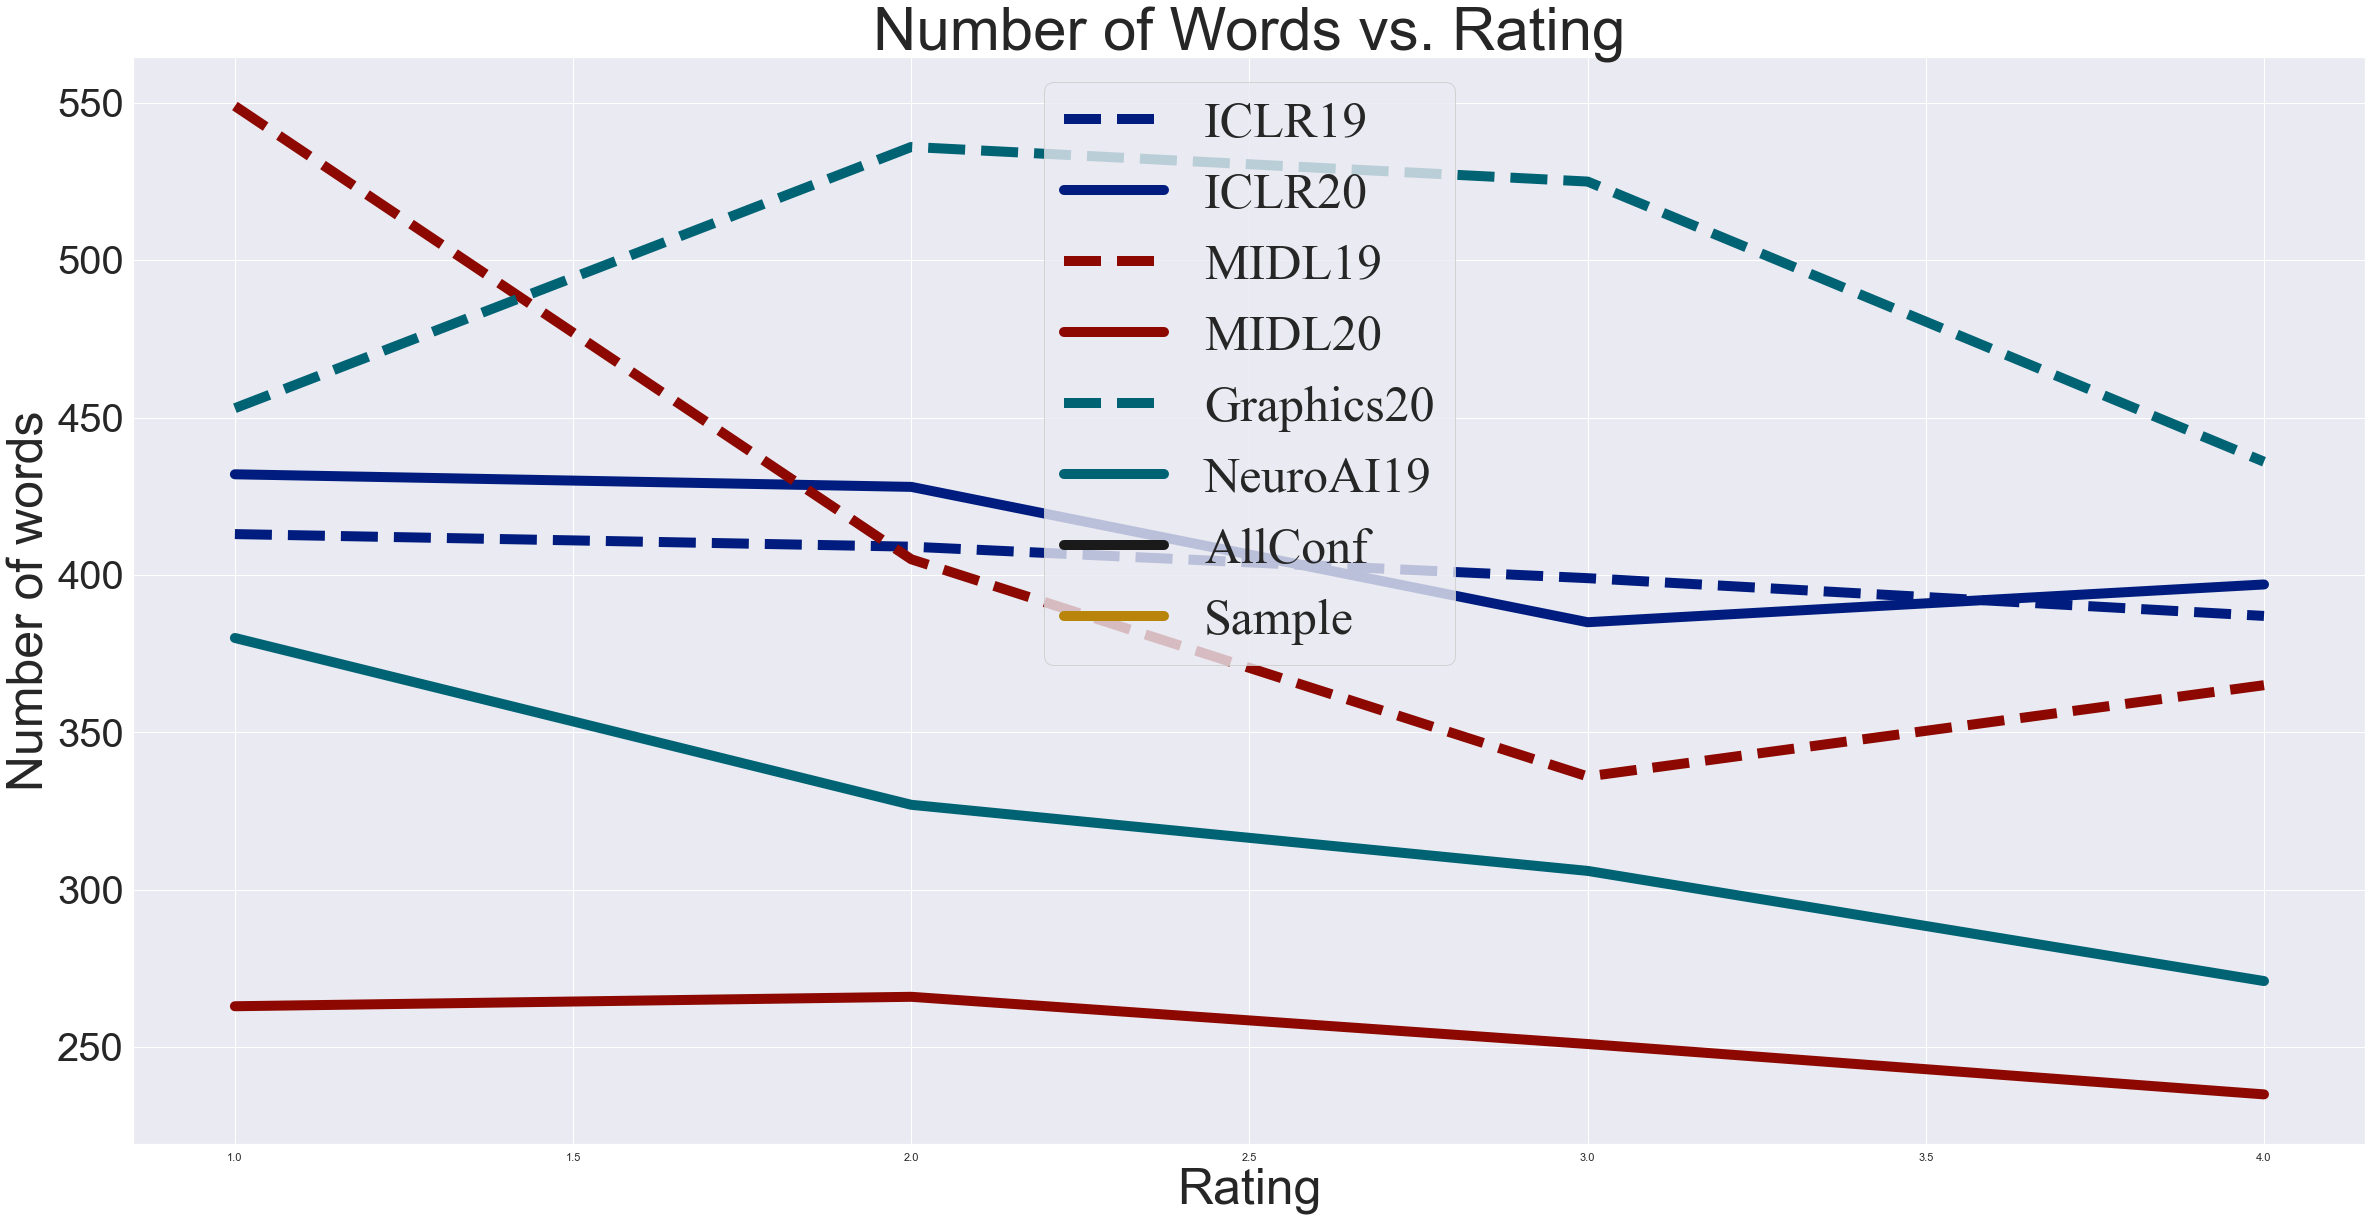

In [63]:
plt.figure(figsize=(40,20))
x=[1,2,3,4]
iclr19=[413,409,399,387]
iclr20=[432,428,385,397]
midl19=[549,405,336,365]
midl20=[263,266,251,235]
graphics20=[453,536,525,436]
neuroai=[380,327,306,271]
a,=plt.plot(x,iclr19,"b--",linewidth=10,label='ICLR19')
b,=plt.plot(x,iclr20,"b-",linewidth=10,label='ICLR20')
c,=plt.plot(x,midl19,"r--",linewidth=10,label='MIDL19')
d,=plt.plot(x,midl20,"r-",linewidth=10,label='MIDL20')
e,=plt.plot(x,graphics20,"c--",linewidth=10,label='Graphics20')
f,=plt.plot(x,neuroai,"c-",linewidth=10,label='NeuroAI19')
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 50,
}
plt.legend(handles=[a,b,c,d,e,f,g,h],prop=font2)
plt.xlabel("Rating",fontsize=50)
plt.ylabel("Number of words",fontsize=50)
plt.title("Number of Words vs. Rating",fontsize=60)
ls = ['1','2','3','4']
#_ = plt.xticks(X,ls,fontsize=40)
plt.yticks(fontsize=40)

In order to investigate the influence of extreme values, we plot the following sets of graphs:

* Blue area describes the difference between max count and min count.

* Red area is the area between mean-std and mean+std. For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set.

* Red line is mean value of number of word

**Mean rating of paper:**

|Conference|Average rating of accepted paper| Average rating of rejected paper|
|:--:|:--:|:--:|
|ICLR19|3.0294|2.1567|
|ICLR20|***3.1936***|2.1315|
|MIDL19|3.0142|2.1458|
|MIDL20|2.7241|***2.4526***|
|Graphics20|3.0151|1.9841|
|NeuroAI19|3.0849|2.1515|
|AllConf|3.0684|2.1529|

**Word Clouds of keywords**

In [64]:
iclr19_= pd.read_csv("conferences_cleaned/iclr19_papers.csv",dtype=str)
iclr20_= pd.read_csv("conferences_cleaned/iclr20_papers.csv",dtype=str)
midl19_= pd.read_csv("conferences_cleaned/midl19_papers.csv",dtype=str)
midl20_= pd.read_csv("conferences_cleaned/midl20_papers.csv",dtype=str)
graph20_= pd.read_csv("conferences_cleaned/graph20_papers.csv",dtype=str)
neuro19_= pd.read_csv("conferences_cleaned/neuroai19_papers.csv",dtype=str)
conf_list=[iclr19_,midl19_,neuro19_,iclr20_,midl20_,graph20_]

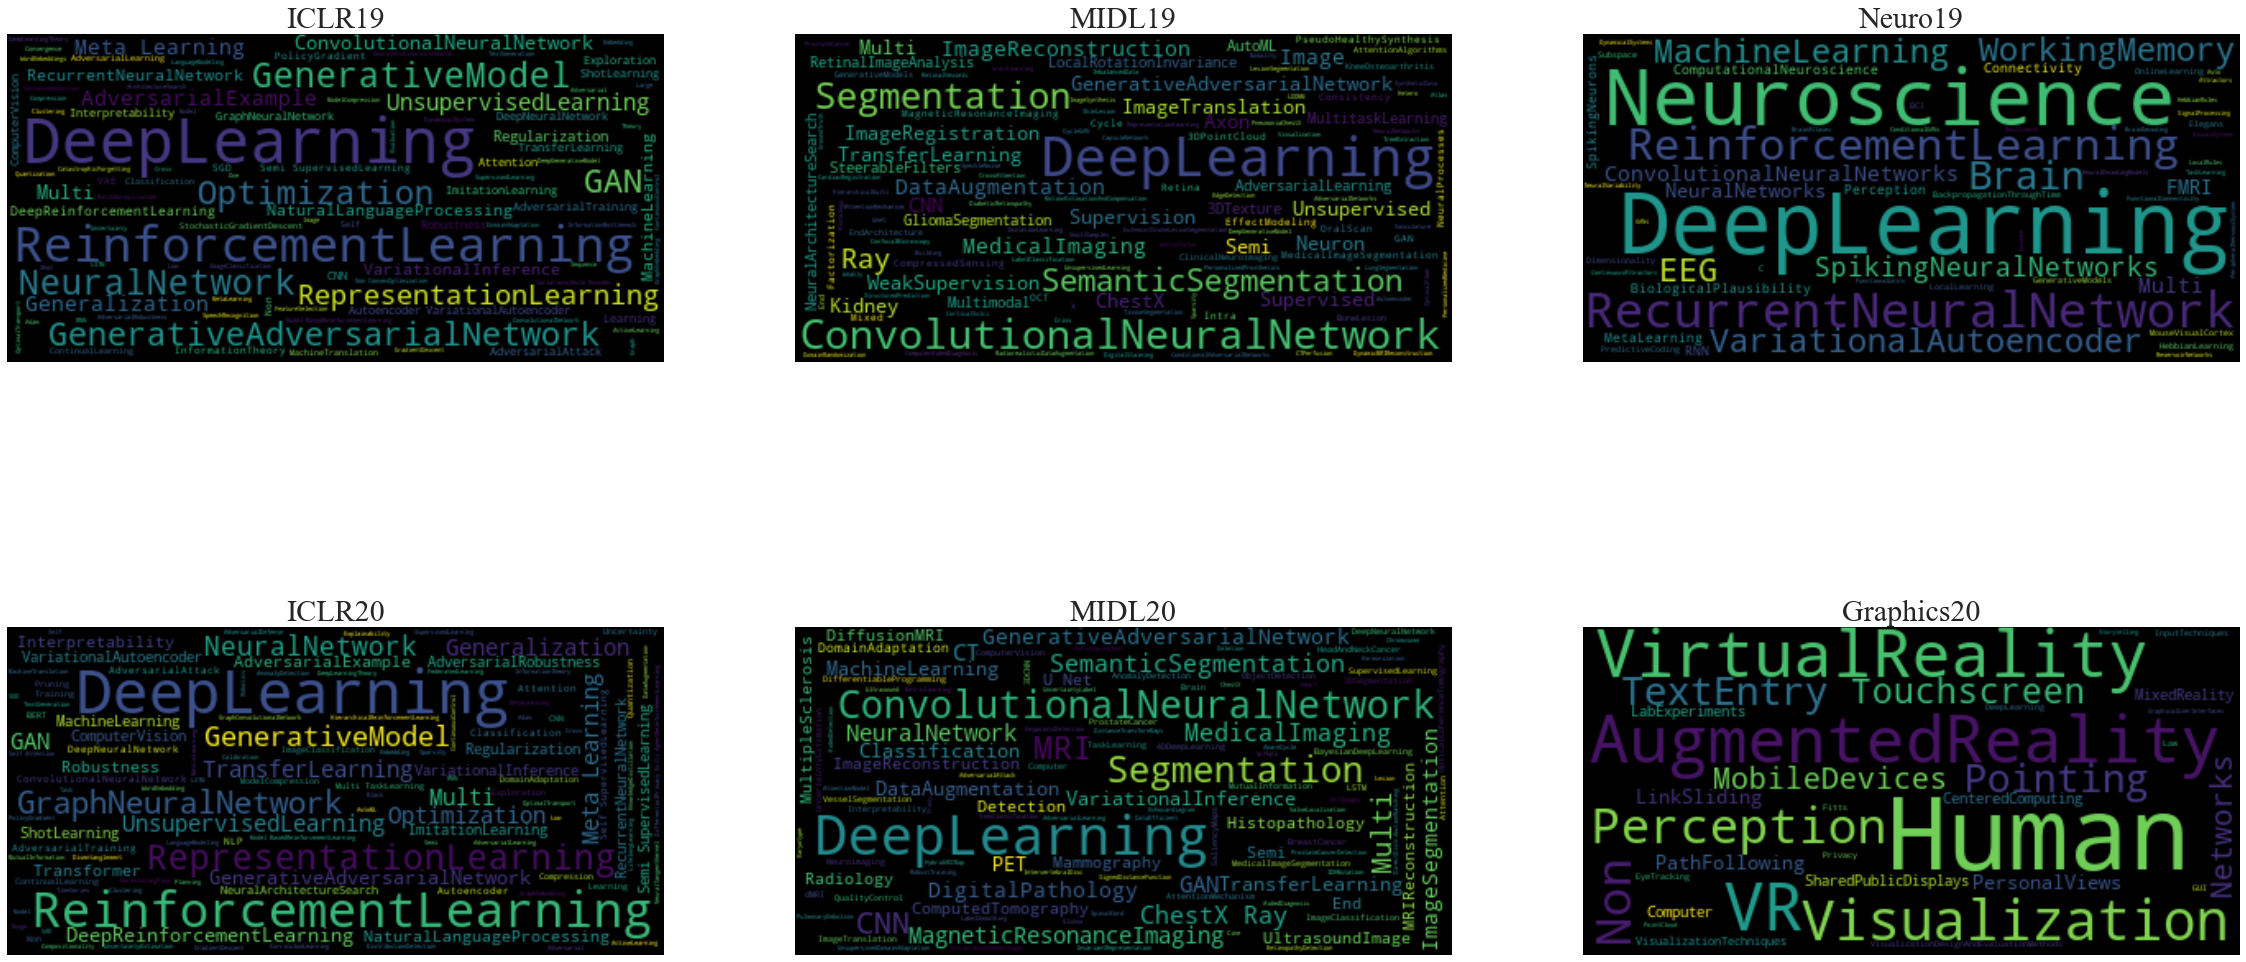

In [67]:
plt.figure(figsize=(40,20))
allresult=''
for j in range(0,6):
    plt.subplot(2,3,j+1)
    width = 1
    keyword = conf_list[j]['keywords']
    k=reduce(lambda x,y:x+y, keyword)
    a = eval('[%s]'%repr(k).replace('[', '').replace(']', ','))
    if "'" in a:
        b=eval('[%s]'%repr(a).replace("'", '').replace(", ",','))
    else:
        b=eval('[%s]'%repr(a).replace("'\'", '').replace("\' ",','))
    result=''
    s=str(b[0][0])
    #print(s)
    for i in range(len(s)):
        if i==0:
            result+=s[i].upper()
        elif s[i-1] == ' ' or s[i-1]=="'" or s[i-1]=="-":
            if s[i].islower():
                result+=s[i].upper()
            else:
                result += s[i]
        elif s[i-1] == ',':
            if s[i].islower():
                result +=','+s[i].upper()
            else:
                result += s[i]
        else:
            result += s[i]
    result=eval('[%s]'%repr(result).replace(" ", ''))
    if 'M' in conf_str[j] or 'N' in conf_str[j]:
        result = eval('[%s]' % repr(result).replace("'", ''))
    allresult+=str(result)
    wordcloud = WordCloud().generate(str(result))
    plt.title(conf_str[j],font1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")